# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import requests
import tweepy
import json
from timeit import default_timer as timer
import re

In [37]:
df_archive_data=pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [107]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
reponse=requests.get(url)
with open("image-predictions.tsv",mode='wb') as file:
    file.write(reponse.content)

In [38]:
df_images=pd.read_csv("image-predictions.tsv", sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [18]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
#créons la variable tweet_ids qui va contenir la liste des tweets ID
tweet_ids = archive_data.tweet_id.values
len(tweet_ids)
#Interroger l'API de Twitter pour les données JSON pour chaque identifiant de tweet dans l'archive Twitter
count = 0
fails_dict = {}
start = timer()


#Enregistrez chaque tweet JSON renvoyé dans une nouvelle ligne dans un fichier tweet_json.txt

with open('tweet_json.txt', 'w',encoding="utf-8") as outfile:
    # Cette boucle prendra probablement un peu de temps à s'exécuter en raison de la limite de débit de Twitter
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [19]:
len(fails_dict)

29

In [39]:
# lire le fichier json tweet_json.txt
list_tweet_json = []

#créer une dictonnaire pour chaque ligne de tweet_json.txt
with open('tweet_json.txt', 'r',encoding = 'utf-8') as json_file:
    for line in json_file:
        data_json  = json.loads(line)
        tweet_id = data_json['id']
        retweet_count = data_json['retweet_count']
        favorite_count = data_json['favorite_count']
        list_tweet_json.append({"tweet_id":tweet_id,
                          "retweet_count":retweet_count,
                          "favorite_count":favorite_count})
#créer un dataframe avec la liste des dictionnaires
df_api_tweets=pd.DataFrame(list_tweet_json,columns=['tweet_id','retweet_count','favorite_count'])   

## Assessing Data

In [29]:
df_archive_data.shape

(2356, 17)

In [30]:
df_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [31]:
df_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [45]:
df_archive_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [35]:
df_archive_data.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Oreo          1
Rolf          1
Bobble        1
Gustav        1
Florence      1
Name: name, Length: 957, dtype: int64

In [49]:
# les noms des noms de chien qui ont des erreurs
names_error=df_archive_data.name.str.contains('^[a-z]', regex = True)
df_archive_data[names_error].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
mad              2
getting          2
actually         2
not              2
his              1
incredibly       1
light            1
life             1
such             1
old              1
by               1
my               1
officially       1
this             1
all              1
space            1
infuriating      1
unacceptable     1
Name: name, dtype: int64

In [50]:
df_archive_data.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [51]:
df_archive_data.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [52]:
df_archive_data.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [53]:
df_archive_data.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [66]:
df_archive_data.rating_numerator.sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776], dtype=int64)

In [92]:
df_archive_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [40]:
regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''

df_error_numerateur=df_archive_data.copy()
df_error_numerateur['pattern'] = df_error_numerateur['text'].apply(get_pattern)

df_error_numerateur['fraction'] = df_error_numerateur['rating_numerator'].astype(str) + '/' + df_error_numerateur['rating_denominator'].astype(str)
df_error_numerateur[df_error_numerateur['pattern'] != df_error_numerateur['fraction']][['pattern', 'fraction']]

,pattern,fraction
45,13.5/10,5/10
313,960/00,960/0
340,9.75/10,75/10
387,007/10,7/10
695,9.75/10,75/10
763,11.27/10,27/10
1689,9.5/10,5/10
1712,11.26/10,26/10
2260,-5/10,5/10


In [54]:
df_images.shape

(2075, 12)

In [97]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [56]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
df_api_tweets.shape

(2327, 3)

In [58]:
df_api_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6978,33722
1,892177421306343426,5279,29251
2,891815181378084864,3465,21985
3,891689557279858688,7198,36817
4,891327558926688256,7722,35202
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [60]:
df_api_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [98]:
df_api_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2460.941556,7032.692737
std,6.820795e+16,4167.983421,10928.495152
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1147.000000,3041.000000
75%,7.986547e+17,2847.000000,8573.000000
max,8.924206e+17,70420.000000,144389.000000


### Quality issues
##### `df_archive_data` 

1. On a beaucoup des valeurs manquantes dans les colonnes:**in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**

2. les colonnes **name, doggo, floofer, pupper et puppo** ont des valeurs manquantes denotées **None** au lieu de **NaN**

3. Supprimer +0000 de la colonne **timestamp** 

4. Le type de données des colonnes **timestamp et retweeted_status_timestamp** doivent être de type **datetime** au lieu du type **object**

5. la colonne name à des noms de chien erronées comme: **None, a etc** 

6. certains valeurs de numerateur ont des valeurs incorrectes (**9,75/10 au lieu de 75/10 ;11,26/10 au lieu de 26/10**)

##### `df_images` 

7. Les prédictions **p1, p2, p3** des chiens ont la **première lettre** parfois en **majuscule** ou en **minuscule**.on doit les uniformiser enfin d'avoir une cohérence dans le format des predictions des noms

8. Les valeurs manquantes (2075 entries  au lieu de 2356 entries)

##### `df_api_tweets` 

9. Les valeurs manquantes (2327 entries  au lieu de 2356 entries)

### Tidiness issues
1. les colonnes doggo, floofer, pupper et puppo doivent être remplacer par **un seul variable dog_stades**

2. df_api_tweets doit être une partie de df_archive_data

## Cleaning Data

In [6]:
# Make copies of original pieces of data
df_archive_data_clean= df_archive_data.copy()
df_images_clean=df_images.copy()
df_api_tweets_clean=df_api_tweets.copy()

### Quality issues#1

#### Define:
Supprimer les colonnes in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp qui ont beaucoup des valeurs manquantes 


#### Code

In [7]:
df_archive_data_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                   'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

#### Test

In [278]:
df_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Tidiness issues#1 & Quality issues#9

#### Define
Fusionner le df_archive_data avec df_api_tweets en tenant compte des entites manquantes dans le dataframe df_api_tweets

#### Code

In [8]:
df_archive_data_clean=pd.merge(df_archive_data_clean,df_api_tweets_clean, on=['tweet_id'], how='right')

#### Test

In [280]:
df_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2327 non-null   int64 
 1   timestamp           2327 non-null   object
 2   source              2327 non-null   object
 3   text                2327 non-null   object
 4   expanded_urls       2269 non-null   object
 5   rating_numerator    2327 non-null   int64 
 6   rating_denominator  2327 non-null   int64 
 7   name                2327 non-null   object
 8   doggo               2327 non-null   object
 9   floofer             2327 non-null   object
 10  pupper              2327 non-null   object
 11  puppo               2327 non-null   object
 12  retweet_count       2327 non-null   int64 
 13  favorite_count      2327 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 272.7+ KB


### Tidiness issues#2 & Quality issues#2

#### Define
Concatiner les colonnes doggo, floofer, pupper et puppo en une seul colonne dog_stades.Ensuite extraire doggo, floofer, pupper et puppo dans la colonne dog_stades en remplaçant None par le NaN.Enfin supprimer les colonnes doggo, floofer, pupper et puppo

#### Code

In [9]:
#concatiner les colonnes doggo, floofer, pupper et puppo en une seul colonne dog_stades
df_archive_data_clean['dog_stades']=df_archive_data_clean.doggo.str.cat(df_archive_data_clean.floofer).str.cat(
                                     df_archive_data_clean.pupper).str.cat(df_archive_data_clean.puppo)

#extraire doggo, floofer, pupper et puppo dans la colonne dog_stades en remplaçant None par le NaN
df_archive_data_clean['dog_stades']=df_archive_data_clean['dog_stades'].str.extract('(doggo|floofer|pupper|puppo)', 
                                                                                        expand=True)
#supprimer les colonnes doggo, floofer, pupper et puppo
df_archive_data_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [282]:
df_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2327 non-null   int64 
 1   timestamp           2327 non-null   object
 2   source              2327 non-null   object
 3   text                2327 non-null   object
 4   expanded_urls       2269 non-null   object
 5   rating_numerator    2327 non-null   int64 
 6   rating_denominator  2327 non-null   int64 
 7   name                2327 non-null   object
 8   retweet_count       2327 non-null   int64 
 9   favorite_count      2327 non-null   int64 
 10  dog_stades          375 non-null    object
dtypes: int64(5), object(6)
memory usage: 218.2+ KB


In [284]:
df_archive_data_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stades
1997,671879137494245376,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brad. He's a chubby lil pup. Doesn't really need the food he's trying to reach. 5/10 you've had enough Brad https://t.co/vPXKSaNsbE,https://twitter.com/dog_rates/status/671879137494245376/photo/1,5,10,Brad,570,1244,NaN
261,840696689258311684,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I didn't even have to intervene. Took him 4 minutes to realize his error. 10/10 for Kevin https://t.co/2gclc1MNr7,https://twitter.com/dog_rates/status/840696689258311684/photo/1,10,10,None,889,11464,NaN
2222,667806454573760512,2015-11-20 20:47:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Filup. He is overcome with joy after finally meeting his father. 10/10 https://t.co/TBmDJXJB75,https://twitter.com/dog_rates/status/667806454573760512/photo/1,10,10,Filup,417,927,NaN
831,764259802650378240,2016-08-13 00:38:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kota and her son Benedict. She doesn't know why you're staring. They are a normal family. Both 10/10 https://t.co/Q1v9BZylvZ,"https://twitter.com/dog_rates/status/764259802650378240/photo/1,https://twitter.com/dog_rates/status/764259802650378240/photo/1",10,10,Kota,1384,5621,NaN
872,758828659922702336,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q,https://twitter.com/dog_rates/status/758828659922702336/photo/1,13,10,None,3542,10452,doggo


In [285]:
df_archive_data_clean['dog_stades'].value_counts()

pupper     243
doggo       94
puppo       29
floofer      9
Name: dog_stades, dtype: int64

In [286]:
df_archive_data_clean['dog_stades'].isnull().sum()

1952

### Quality issues#3

#### Define
Supprimer +0000 de la colonne **timestamp** 

#### Code

In [10]:
df_archive_data_clean.timestamp = df_archive_data_clean.timestamp.str[:-5].str.strip()

#### Test

In [288]:
df_archive_data_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stades
2322,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,36,88,NaN
2323,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,115,246,NaN
2324,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,36,100,NaN
2325,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,39,112,NaN
2326,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,420,2284,NaN


### Quality issues#4 

#### Define
Convertir la colonne **timestamp** en **datetime** 

#### Code

In [11]:
df_archive_data_clean['timestamp'] = pd.to_datetime(df_archive_data_clean['timestamp'])

#### Test

In [290]:
df_archive_data_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
retweet_count                  int64
favorite_count                 int64
dog_stades                    object
dtype: object

### Quality issues#5

#### Define
Remplacer les noms de chien erronés avec np.nan 

#### Code

In [12]:
#remplacer les noms de chien erronées avec np.nan 
df_archive_data_clean.name=df_archive_data_clean.name.str.replace('^[a-z]+','None')
df_archive_data_clean.name.replace('None',np.nan,inplace=True)

#### Test

In [292]:
df_archive_data_clean.name.value_counts()

Oliver      11
Charlie     11
Cooper      11
Tucker      10
Lucy        10
            ..
Bruiser      1
Griswold     1
Mona         1
Duchess      1
Florence     1
Name: name, Length: 929, dtype: int64

In [293]:
df_archive_data_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey', 'Dave',


In [294]:
df_archive_data_clean.name.isnull().sum()

840

### Quality issues#6

#### Define
Remplacer les 3 valeurs de numérateur incorrectes par les valeurs arrondies des vraies valeurs(**9,75/10 par 10/10 et 11,26/10 par 11/10**)

#### Code

In [13]:
#remplacer les 3 valeurs avec iloc sur les indices de ses lignes
df_archive_data_clean.iloc[324,5]=10
df_archive_data_clean.iloc[675,5]=10
df_archive_data_clean.iloc[1684,5]=11

#### Test

In [296]:
df_archive_data_clean.iloc[[324,675,1684]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stades
324,832215909146226688,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",https://twitter.com/dog_rates/status/786709082849828864/photo/1,10,10,Logan,5712,0,NaN
675,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,10,10,Logan,5712,17328,NaN
1684,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11,10,NaN,438,1573,NaN


### Quality issues#7

#### Define
Convertir les prédictions **p1, p2, p3** des chiens en utilisant la méthode **str.capitalize()** enfin d'uniformiser le format des prédictions

#### Code

In [14]:
df_images_clean.p1=df_images_clean.p1.str.capitalize()
df_images_clean.p2=df_images_clean.p2.str.capitalize()
df_images_clean.p3=df_images_clean.p3.str.capitalize()

#### Test

In [298]:
df_images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### Quality issues#8

#### Define
Supprimer les lignes de df_archive_data qui n'existent pas dans df_images , en se basant sur tweet_id

#### Code

In [15]:
id_tweets=df_images_clean[['tweet_id','jpg_url']]
df_archive_data_clean=pd.merge(df_archive_data_clean,id_tweets,on=['tweet_id'],how='right')

In [16]:
df_archive_data_clean['rating_numerator']=df_archive_data_clean['rating_numerator'].fillna(0).astype(np.int64)
df_archive_data_clean['rating_denominator']=df_archive_data_clean['rating_denominator'].fillna(0).astype(np.int64)
df_archive_data_clean['retweet_count']=df_archive_data_clean['retweet_count'].fillna(0).astype(np.int64)
df_archive_data_clean['favorite_count']=df_archive_data_clean['favorite_count'].fillna(0).astype(np.int64)

#### Test

In [17]:
df_archive_data_clean.shape

(2075, 12)

In [18]:
df_images_clean.shape

(2075, 12)

In [19]:
df_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   int64         
 1   timestamp           2057 non-null   datetime64[ns]
 2   source              2057 non-null   object        
 3   text                2057 non-null   object        
 4   expanded_urls       2057 non-null   object        
 5   rating_numerator    2075 non-null   int64         
 6   rating_denominator  2075 non-null   int64         
 7   name                1386 non-null   object        
 8   retweet_count       2075 non-null   int64         
 9   favorite_count      2075 non-null   int64         
 10  dog_stades          318 non-null    object        
 11  jpg_url             2075 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 210.7+ KB


In [318]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Storing Data

In [20]:
#reorganiser la liste des colonnes avant de sauvegarder les dataframes
column_list=['tweet_id','name','dog_stades','rating_numerator','rating_denominator','retweet_count','favorite_count',
             'text','timestamp','source','jpg_url','expanded_urls']
df_archive_data_clean=df_archive_data_clean[column_list]

In [325]:
#sauvegarder les dataframes dans les fichiers csv
df_archive_data_clean.to_csv('twitter_archive_master.csv', index=False)
df_images_clean.to_csv('image_predictions_clean.csv',index=False)

## Analyzing and Visualizing Data

### Insights:
1. Quels sont les noms de chien les plus populaires ?

2. Quelle est la corrélation entre le nombre de retweets et le nombre de favoris ?

3. Quelle sont les stades de chien les plus courant ?

4. Quels sont les stades de chien les plus Likes ?

### Visualization

In [33]:
#créons la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre,savefigNom) qui va affiche le titre, xlabel,
#ylabel,fontsize et le nom de sauvegarder du graphique
def affiche_graphique_labels(titre,xlabel,ylabel, sizetitre, savefigNom):
    plt.title(titre,fontsize=sizetitre);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(savefigNom)
    return plt

#### 1. Quels sont les noms de chien les plus populaires?

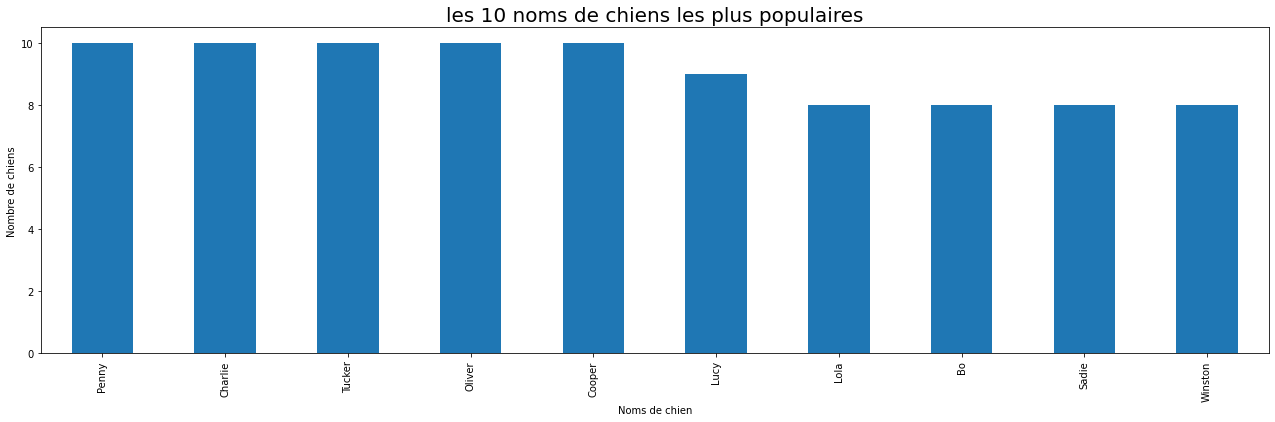

In [37]:
#faire une copie de dataframe nettoyer
df_archive_master=df_archive_data_clean.copy()

#nous utiliserons matplotlib fonction pour tracer le figure
plt.figure(figsize=(22,6))
df_archive_master['name'].value_counts().nlargest(10).plot(kind='bar')
#la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel et fontsize et le nom de sauvegarder du graphique
affiche_graphique_labels("les 10 noms de chiens les plus populaires","Noms de chien",
                         "Nombre de chiens",20,"populaire-noms-chien");

> on peut conclure que les 10 noms de chien les plus populaires sont: **Penny, Charlie, Tucker, Oliver, Cooper**.Suivi de **Lucy** et vient ensuite **Lola, Bo, Sadie et Winston**.

#### 2. Quelle est la correlation entre le nombre de retweets et le nombre de favoris?

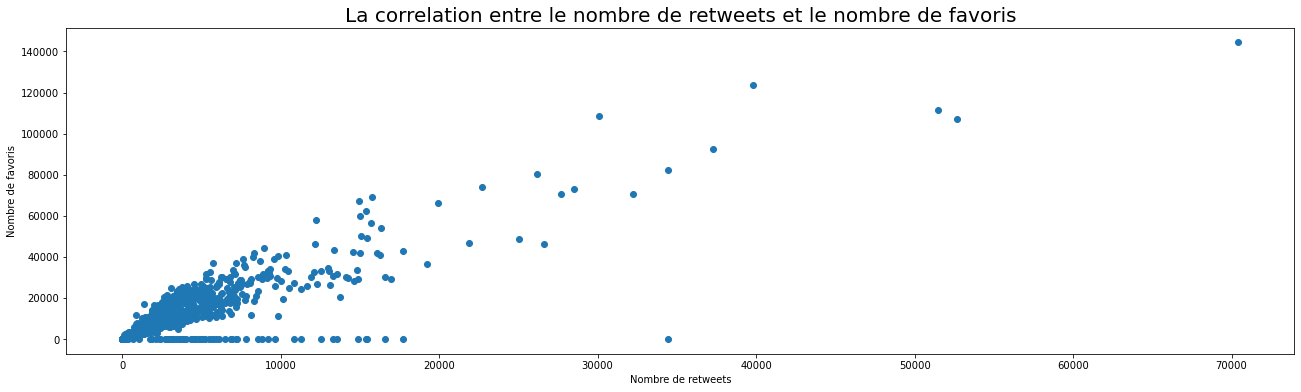

In [38]:
#utilisons plt.scatter() pour voir la correlation entre le nombre de retweets et le nombre de favoris
plt.figure(figsize=(22,6))
plt.scatter(df_archive_master.iloc[:,5],df_archive_master.iloc[:,6])
#la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel,fontsize et le nom de sauvegarder du graphique
affiche_graphique_labels("La correlation entre le nombre de retweets et le nombre de favoris","Nombre de retweets",
                         "Nombre de favoris",20,"correlation-retweets-favoris");

> pour resume,il existe une corrélation linéaire positive entre le nombre de retweets et le nombre de favoris.

#### 3. Quelle sont les stades de chien les plus courant ?

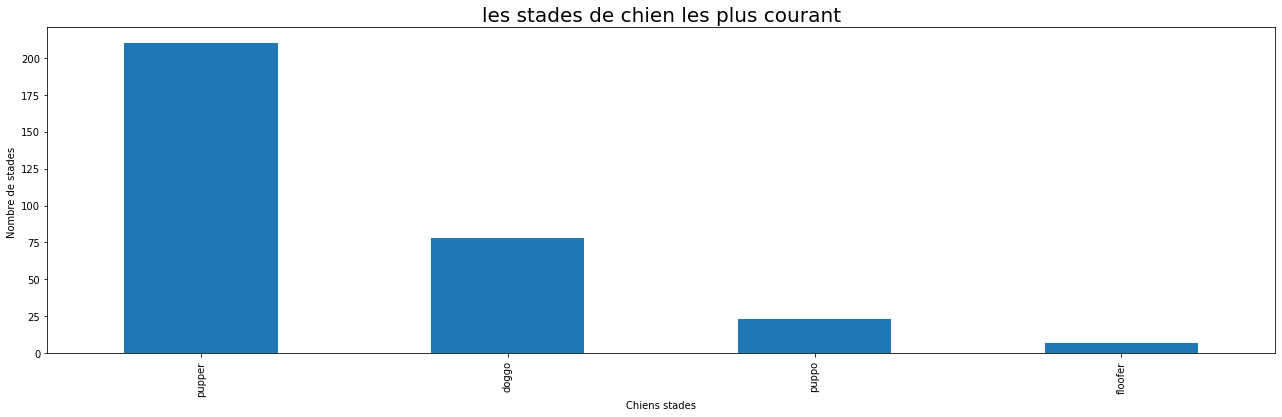

In [45]:
#nous utiliserons matplotlib fonction pour tracer le figure
plt.figure(figsize=(22,6))
df_archive_master['dog_stades'].value_counts().plot(kind='bar')
#la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel et fontsize et le nom de sauvegarder du graphique
affiche_graphique_labels("les stades de chien les plus courant","Chiens stades","Nombre de stades ",20,"stades-chien-courant");

>on peut voir que le stade de chien le plus courant est **pupper** qui compte **210**, ensuite **doggo** qui compte **78**,  **puppo** pour **23** et **flooter** pour **7** 

#### 4. Quels sont les stades de chien les plus likes?

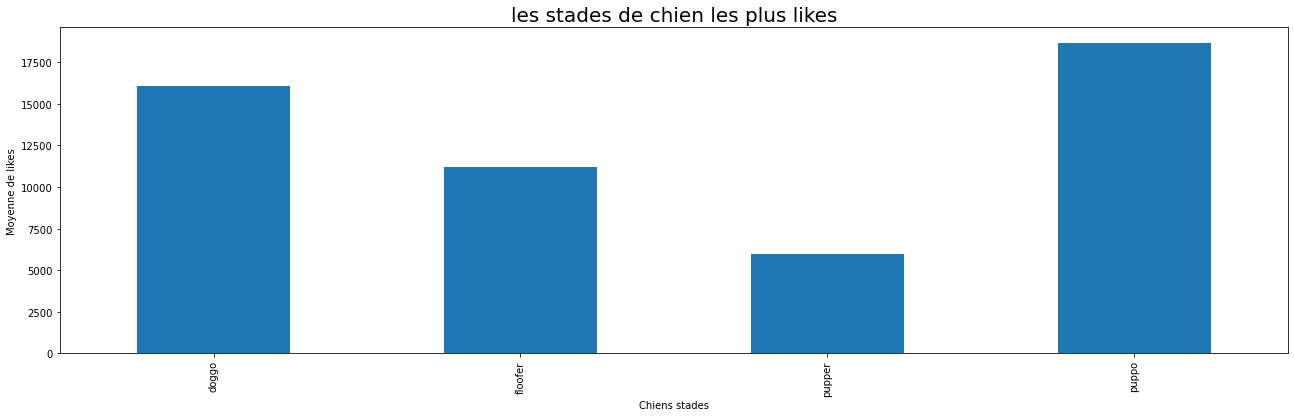

In [58]:
#nous utiliserons matplotlib fonction pour tracer le figure
plt.figure(figsize=(22,6))
df_archive_master.groupby('dog_stades')['favorite_count'].mean().plot(kind='bar')

#la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel et fontsize et le nom de sauvegarder du graphique
affiche_graphique_labels("les stades de chien les plus likes","Chiens stades","Moyenne de likes",20,"stades-chien-likes");

> on peut conclure que **puppo** est le stade de chien le plus likes,suivi de **doggo**, **flooter** et **pupper** 